# Naive Bayes High Low Return Prediction Analysis
**German Hernandez**

Based on the post [Machine Learning on Quantopian - Thomas Wiecki ](https://www.quantopian.com/posts/machine-learning-on-quantopian) in Quantopian

This Notebook uses a **Gaussian Naive Bayes model** to predict if a stock will have a return **n_fwd_days** after that will be in the  **top percentile% of returns (class 1)** of the **lower  percentile% (class -1)** using as input variables the returns of 1,2,3,,4,5,6,7,8,9 and 10 days before .

In [1]:
for i in range(0, 4):
    print ("This is number %s" % i)

This is number 0
This is number 1
This is number 2
This is number 3


In [2]:
n_fwd_days = 5 # number of days to compute returns over

percentile = 25 # target percetile of the prediction

We use dayly returns of the good quality Quantopian tradable stocks [QTradableStocksUS()](https://www.quantopian.com/posts/working-on-our-best-universe-yet-qtradablestocksus) in a period of between the **start** and **end** dates.

In [3]:
from quantopian.pipeline.filters import QTradableStocksUS
universe = QTradableStocksUS()

import pandas as pd
start = pd.Timestamp("2018-05-26")
end = pd.Timestamp("2018-09-26")


We use the [Quantopian Pipeline API](https://www.quantopian.com/tutorials/pipeline) that allows to build preprocesing filters form multiple stokcs to calcute the decision variables that we want use in trading algorithm.

We import the **Returns** function form pipeline because our input variables are past returns and our predicted class depends on the n_fwd_days ahead return.

## Building the training and testing data set

In [4]:
from quantopian.pipeline.factors import Returns

We define the function **make_factors()** that define the fucntions that will calculate the input variables for the classfication, in Quantopian the input variables used to make decision in trading algorithsm are called **factors**

We define a function inside make_factors() for ecah one of the  1,2,3,,4,5,6,7,8,9 and 10 previous returns that we are using as input variables, in order to to this we call Returns(), one of the [Built-in Factors](https://www.quantopian.com/help#module-quantopian_pipeline_factors) in the the [Quantopian Pipeline API] Returns is only called with window_lengt parameter(number of days of caculate te return)  so is using the default inputs= [USEquityPricing.close] but returns can be used other inputs like inputs=[USEquityPricing.open]

The function **make_factors()** returns a list of names and pinter to the fucntions that will be used to buld the pipeline that calculates the input variables.

In [6]:
def make_factors():
    def Asset_Growth_1d():
        return Returns(window_length=2)
    def Asset_Growth_2d():
        return Returns(window_length=3)
    def Asset_Growth_3d():
        return Returns(window_length=4)
    def Asset_Growth_4d():
        return Returns(window_length=5)
    def Asset_Growth_5d():
        return Returns(window_length=6)
    def Asset_Growth_6d():
        return Returns(window_length=7)
    def Asset_Growth_7d():
        return Returns(window_length=8)
    def Asset_Growth_8d():
        return Returns(window_length=9)
    def Asset_Growth_9d():
        return Returns(window_length=10)
    def Asset_Growth_10d():
        return Returns(window_length=11) 
    def Asset_Growth_11d():
        return Returns(window_length=12) 
    def Asset_Growth_12d():
        return Returns(window_length=13) 
    
    def Asset_Growth_13d():
        return Returns(window_length=14) 
    
    def Asset_Growth_14d():
        return Returns(window_length=15) 
    
    def Asset_Growth_15d():
        return Returns(window_length=16) 
    
    
    
    
    all_factors = {
        'Asset Growth 1d': Asset_Growth_1d,
        'Asset Growth 2d': Asset_Growth_2d,
        'Asset Growth 3d': Asset_Growth_3d,
        'Asset Growth 4d': Asset_Growth_4d,
        'Asset Growth 5d': Asset_Growth_5d,
        'Asset Growth 6d': Asset_Growth_6d,
        'Asset Growth 7d': Asset_Growth_7d,
        'Asset Growth 8d': Asset_Growth_8d,
        'Asset Growth 9d': Asset_Growth_9d,
        'Asset Growth 10d': Asset_Growth_10d,
        'Asset Growth 11d': Asset_Growth_11d,
        'Asset Growth 12d': Asset_Growth_12d,
        'Asset Growth 13d': Asset_Growth_13d,
        'Asset Growth 14d': Asset_Growth_14d,
        'Asset Growth 15d': Asset_Growth_15d
    }     

    return all_factors

factors = make_factors()

factors

{'Asset Growth 10d': <function __main__.Asset_Growth_10d>,
 'Asset Growth 11d': <function __main__.Asset_Growth_11d>,
 'Asset Growth 12d': <function __main__.Asset_Growth_12d>,
 'Asset Growth 13d': <function __main__.Asset_Growth_13d>,
 'Asset Growth 14d': <function __main__.Asset_Growth_14d>,
 'Asset Growth 15d': <function __main__.Asset_Growth_15d>,
 'Asset Growth 1d': <function __main__.Asset_Growth_1d>,
 'Asset Growth 2d': <function __main__.Asset_Growth_2d>,
 'Asset Growth 3d': <function __main__.Asset_Growth_3d>,
 'Asset Growth 4d': <function __main__.Asset_Growth_4d>,
 'Asset Growth 5d': <function __main__.Asset_Growth_5d>,
 'Asset Growth 6d': <function __main__.Asset_Growth_6d>,
 'Asset Growth 7d': <function __main__.Asset_Growth_7d>,
 'Asset Growth 8d': <function __main__.Asset_Growth_8d>,
 'Asset Growth 9d': <function __main__.Asset_Growth_9d>}

We import the **Pipeline** function from the [Quantopian Pipeline API](https://www.quantopian.com/tutorials/pipeline) that build a preprocesing filters from a dictionary of factors names and pointers.

In [7]:
from quantopian.pipeline import Pipeline

We use the Pipeline to define the **make_history_pipeline()** that will produce the filter that will be applied to obtain build datafarem with the information of the input and target variables.

In [8]:
from quantopian.pipeline.data.builtin import USEquityPricing


def make_history_pipeline(factors, universe, n_fwd_days=5):
    
    # Build dictionary of factors names and definitions used to calculate the information of the input variables 
    factor_ranks = {name: f() for name, f in factors.iteritems()}
    
    # Add to the dictionary the factor name and definitios used to calculate the information of the target variable
    factor_ranks['Returns'] = Returns(inputs=[USEquityPricing.open],window_length=n_fwd_days)
    
    print factor_ranks
    
    pipe = Pipeline(screen=universe, columns=factor_ranks)
    
    return pipe

history_pipe = make_history_pipeline(factors, universe, n_fwd_days=n_fwd_days)

history_pipe

{'Asset Growth 4d': Returns([EquityPricing.close], 5), 'Asset Growth 13d': Returns([EquityPricing.close], 14), 'Asset Growth 5d': Returns([EquityPricing.close], 6), 'Asset Growth 7d': Returns([EquityPricing.close], 8), 'Asset Growth 12d': Returns([EquityPricing.close], 13), 'Asset Growth 15d': Returns([EquityPricing.close], 16), 'Asset Growth 3d': Returns([EquityPricing.close], 4), 'Returns': Returns([EquityPricing<US>.open], 5), 'Asset Growth 8d': Returns([EquityPricing.close], 9), 'Asset Growth 2d': Returns([EquityPricing.close], 3), 'Asset Growth 9d': Returns([EquityPricing.close], 10), 'Asset Growth 10d': Returns([EquityPricing.close], 11), 'Asset Growth 14d': Returns([EquityPricing.close], 15), 'Asset Growth 6d': Returns([EquityPricing.close], 7), 'Asset Growth 11d': Returns([EquityPricing.close], 12), 'Asset Growth 1d': Returns([EquityPricing.close], 2)}


We import the **run_pipeline** function from the [Quantopian Pipeline API](https://www.quantopian.com/tutorials/pipeline) that receives a pipe, a star_date and end_date, and  builds data frame with the the information of the input and target variables in that period.

In [9]:
from quantopian.research import run_pipeline

We call  **run_pipeline** with the history_pipe between to between the **start** and **end** dates.

In [10]:
from time import time
start_timer = time()
results = run_pipeline(history_pipe, start_date=start, end_date=end)
results.index.names = ['date', 'security']
end_timer = time()
print "Time to run pipeline %.2f secs" % (end_timer - start_timer)

Time to run pipeline 9.76 secs


In [11]:
results.head()

Asset Growth 10d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.012630   
                          Equity(24 [AAPL])         -0.000053   
                          Equity(41 [ARCB])         -0.002544   
                          Equity(52 [ABM])          -0.038961   
                          Equity(53 [ABMD])          0.057736   

                                             Asset Growth 11d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.015978   
                          Equity(24 [AAPL])         -0.003856   
                          Equity(41 [ARCB])          0.273778   
                          Equity(52 [ABM])          -0.037854   
                          Equity(53 [ABMD])          0.068288   

                                             Asset Growth 12d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.023591   
                          Equity(24 [AAPL])          0.010393   
                          Equity(41 [ARCB])          0.289461   
                          Equity(52 [ABM])          -0.039435   
                          Equity(53 [ABMD])          0.100416   

                                             Asset Growth 13d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.035955   
                          Equity(24 [AAPL])          0.017562   
                          Equity(41 [ARCB])          0.331350   
                          Equity(52 [ABM])          -0.039119   
                          Equity(53 [ABMD])          0.134308   

                                             Asset Growth 14d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.049516   
                          Equity(24 [AAPL])          0.022729   
                          Equity(41 [ARCB])          0.366081   
                          Equity(52 [ABM])          -0.030192   
                          Equity(53 [ABMD])          0.133362   

                                             Asset Growth 15d  \
date                      security                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])           0.070848   
                          Equity(24 [AAPL])          0.029795   
                          Equity(41 [ARCB])          0.395405   
                          Equity(52 [ABM])          -0.035950   
                          Equity(53 [ABMD])          0.128106   

                                             Asset Growth 1d  Asset Growth 2d  \
date                      security                                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])         -0.002704        -0.010730   
                          Equity(24 [AAPL])         0.001966         0.000690   
                          Equity(41 [ARCB])        -0.022845        -0.003178   
                          Equity(52 [ABM])          0.000000        -0.005106   
                          Equity(53 [ABMD])        -0.001141        -0.004295   

                                             Asset Growth 3d  Asset Growth 4d  \
date                      security                                              
2018-05-29 00:00:00+00:00 Equity(2 [ARNC])         -0.005930         0.000000   
                          Equity(24 [AAPL])         0.006780         0.005117   
                          Equity(41 [ARCB])        -0.020812        -0.045639   
                          Equity(52 [ABM])         -0.020771        -0.026316   
                          Equity(53 [ABMD])         0.020061         0.039680   

                                             Asset Growth 5d  Asset Growth 6d  \
date                      security                                              
2018-05-29 

In [12]:
results.tail()

Asset Growth 10d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.150759   
                          Equity(51576 [CASA])           -0.001304   
                          Equity(51580 [NMRK])           -0.078969   
                          Equity(51615 [LILA_K])          0.071142   
                          Equity(51618 [NTR])             0.031267   

                                                  Asset Growth 11d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.158930   
                          Equity(51576 [CASA])            0.015915   
                          Equity(51580 [NMRK])           -0.098454   
                          Equity(51615 [LILA_K])          0.063682   
                          Equity(51618 [NTR])             0.043950   

                                                  Asset Growth 12d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.196842   
                          Equity(51576 [CASA])            0.026122   
                          Equity(51580 [NMRK])           -0.102107   
                          Equity(51615 [LILA_K])          0.068466   
                          Equity(51618 [NTR])             0.052900   

                                                  Asset Growth 13d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.097208   
                          Equity(51576 [CASA])            0.032345   
                          Equity(51580 [NMRK])           -0.130980   
                          Equity(51615 [LILA_K])          0.061569   
                          Equity(51618 [NTR])             0.054439   

                                                  Asset Growth 14d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.065261   
                          Equity(51576 [CASA])            0.018617   
                          Equity(51580 [NMRK])           -0.114309   
                          Equity(51615 [LILA_K])          0.070606   
                          Equity(51618 [NTR])             0.052325   

                                                  Asset Growth 15d  \
date                      security                                   
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])            0.093814   
                          Equity(51576 [CASA])            0.045377   
                          Equity(51580 [NMRK])           -0.119237   
                          Equity(51615 [LILA_K])          0.084729   
                          Equity(51618 [NTR])             0.042818   

                                                  Asset Growth 1d  \
date                      security                                  
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])           0.020192   
                          Equity(51576 [CASA])          -0.009056   
                          Equity(51580 [NMRK])          -0.036522   
                          Equity(51615 [LILA_K])        -0.004655   
                          Equity(51618 [NTR])            0.014572   

                                                  Asset Growth 2d  \
date                      security                                  
2018-09-26 00:00:00+00:00 Equity(51542 [DNLI])           0.011439   
                          Equity(51576 [CASA])          -0.054904   
                          Equity(51580 [NMRK])          -0.022065   
                          Equity(51615 [LILA_K])        -0.008349   
                          Equity(51618 [NTR])            0.008210   

                                                  Asset Growth 3d  \
date                      security                                 

We extract, shift,mask,recode and split the information for the **X_train and X_test  (input variables)** and the **Y_train and Y_test(target)** variable, using the information in the **results** dataframe.

We split our data into **training** (80%) and testing (20%).

In [16]:
import numpy as np

training = 0.8

In [17]:
results_wo_returns = results.copy()
returns = results_wo_returns.pop('Returns')
Y = returns.unstack().values
X = results_wo_returns.to_panel() 
X = X.swapaxes(2, 0).swapaxes(0, 1).values # (factors, time, stocks) -> (time, stocks, factors)

In [18]:
n_time, n_stocks, n_factors = X.shape
train_size = np.int16(np.round(training * n_time))
X_train_aux, Y_train_aux = X[:train_size, ...], Y[:train_size]
X_test_aux, Y_test_aux = X[(train_size+n_fwd_days):, ...], Y[(train_size+n_fwd_days):]

We check how many **(days, stocks, varaibles)**  we have in the training set before fitering nans

In [19]:
n_time, n_stocks, n_factors = X_train_aux.shape
print X_train_aux.shape, n_time* n_stocks

(68, 2293, 15) 155924


We check how many **(days, stocks, varaibles)** we have in the testing set before fitering nans

In [20]:
n_time, n_stocks, n_factors = X_test_aux.shape
print X_test_aux.shape, n_time* n_stocks

(12, 2293, 15) 27516


We crate a helper function **shift_recode_mask_data ()** that 
* Shift factors (input variables - returns) to align these with the future target (return n_fwd_days days ahead).
* Recode the target Y as 1 and -1
* Eliminates examples thathave nan values or are not in the classes 1 and -1

In [23]:
def shift_recode_mask_data(X, Y, upper_percentile=100-percentile, lower_percentile=percentile, n_fwd_days=1):
    # Shift X to match factors at t to returns at t+n_fwd_days (we want to predict future returns after all)
    shifted_X = np.roll(X, n_fwd_days+1, axis=0)
    
    # Slice off rolled elements
    X = shifted_X[n_fwd_days+1:]
    Y = Y[n_fwd_days+1:]
    
    n_time, n_stocks, n_factors = X.shape
    
    # Look for biggest up and down movers
    upper = np.nanpercentile(Y, upper_percentile, axis=1)[:, np.newaxis]
    lower = np.nanpercentile(Y, lower_percentile, axis=1)[:, np.newaxis]
  
    upper_mask = (Y >= upper)
    lower_mask = (Y <= lower)
    
    mask = upper_mask | lower_mask # This also drops nans
    mask = mask.flatten()
    
    # Only try to predict whether a stock moved up/down relative to other stocks
    Y_binary = np.zeros(n_time * n_stocks)
    Y_binary[upper_mask.flatten()] = 1
    Y_binary[lower_mask.flatten()] = -1
    
    # Flatten X
    X = X.reshape((n_time * n_stocks, n_factors))

    # Drop stocks that did not move much (i.e. are not in the upper_percentile or the lower_percentile )
    X = X[mask]
    Y_binary = Y_binary[mask]
    
    # Drop stocks with nan returns
    masknan=  ~np.isnan(X).any(axis=1)
    X = X[masknan]
    Y_binary = Y_binary[masknan]
    
    return X, Y_binary

In [24]:
X_train, Y_train = shift_recode_mask_data(X_train_aux, Y_train_aux, n_fwd_days=n_fwd_days)
X_test, Y_test = shift_recode_mask_data(X_test_aux, Y_test_aux, n_fwd_days=n_fwd_days, 
                                             lower_percentile=50, 
                                             upper_percentile=50)

We check how many examples we have in the traning and  testing set after applying shift_recode_mask_data ()

In [25]:
X_train.shape, X_test.shape

((67493, 15), (13133, 15))

## Explore the data visualy

In [27]:
import matplotlib.pyplot as plt

X = X_train
Y = Y_train

color = [] 
for i in range(len(Y)):
    if Y[i] == 1:
        color.append('green')
    else:
        color.append('red')
        


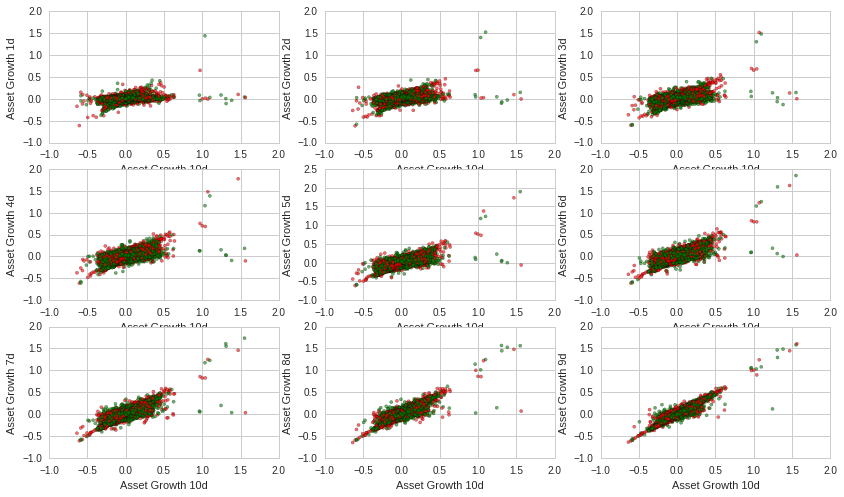

In [63]:
plt.subplot(3, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 1d')

plt.subplot(3, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c=color, alpha= 0.6, s=10, edgecolor='k')  
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 2d')

plt.subplot(3, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 3d')

plt.subplot(3, 3, 4)
plt.scatter(X[:, 0], X[:, 4], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 4d')

plt.subplot(3, 3, 5)
plt.scatter(X[:, 0], X[:, 5], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 5d')

plt.subplot(3, 3, 6)
plt.scatter(X[:, 0], X[:, 6], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 6d')

plt.subplot(3, 3, 7)
plt.scatter(X[:, 0], X[:, 7], c=color, alpha= 0.6, s=10, edgecolor='k')  
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 7d')

plt.subplot(3, 3, 8)
plt.scatter(X[:, 0], X[:, 8], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 8d')

plt.subplot(3, 3, 9)
plt.scatter(X[:, 0], X[:, 9], c=color, alpha= 0.6, s=10, edgecolor='k') 
plt.xlabel('Asset Growth 10d')
plt.ylabel('Asset Growth 9d')

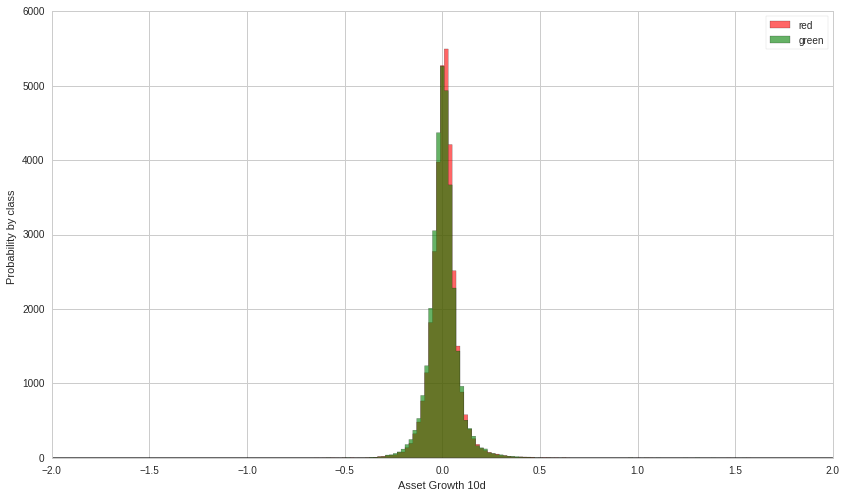

In [28]:
x = X[:,0]

mask = (Y == 1)
xg = x[mask]

mask = (Y == -1)
xr = x[mask]

xlim = (-2, 2)
bins = np.linspace(xlim[0], xlim[1], 200)

plt.hist(xr, bins, alpha=0.6,  histtype='stepfilled', label='red',  color='red')
plt.hist(xg, bins, alpha=0.6,  histtype='stepfilled', label='green', color='green' )
plt.legend(loc='upper right')
plt.xlabel('Asset Growth 10d')
plt.ylabel('Probability by class ')
plt.show()

In [30]:
import pandas as pd
labels = [
          'Asset Growth 15d',
          'Asset Growth 14d',
          'Asset Growth 13d',
          'Asset Growth 12d',
          'Asset Growth 11d',
          'Asset Growth 10d',
          'Asset Growth 1d',
          'Asset Growth 2d',
          'Asset Growth 3d',
          'Asset Growth 4d',
          'Asset Growth 5d',
          'Asset Growth 6d',
          'Asset Growth 7d',
          'Asset Growth 8d',
          'Asset Growth 9d']      
df = pd.DataFrame(X_train, columns=labels)
df['target'] = Y_train
df.sample(20)

,Asset Growth 15d,Asset Growth 14d,Asset Growth 13d,Asset Growth 12d,Asset Growth 11d,Asset Growth 10d,Asset Growth 1d,Asset Growth 2d,Asset Growth 3d,Asset Growth 4d,Asset Growth 5d,Asset Growth 6d,Asset Growth 7d,Asset Growth 8d,Asset Growth 9d,target
399,-0.013183,-0.025651,-0.032319,-0.021154,0.008720,0.001969,-0.018890,0.000000,0.004341,-0.028626,-0.059845,-0.060886,-0.062788,-0.016615,0.005929,-1.0
39536,-0.048679,-0.027017,-0.045799,-0.042901,-0.036315,-0.036315,-0.009041,-0.016003,-0.020591,-0.021731,-0.030385,-0.038153,-0.052968,-0.059328,-0.064217,1.0
46749,0.056922,0.088193,0.049671,0.028779,0.018913,0.017829,0.080203,0.077768,0.083569,0.087575,0.087575,0.073534,0.081425,0.085106,0.059557,-1.0
37839,0.032353,0.029661,0.039829,0.022330,0.042574,0.033028,-0.001580,-0.001580,0.005411,-0.019249,-0.030387,-0.012195,-0.005353,0.028990,0.023655,-1.0
18990,0.125461,0.153119,0.157495,0.179884,0.161905,0.161905,-0.001637,-0.004894,-0.017713,-0.031746,-0.034810,-0.036335,-0.065850,0.004942,0.095153,-1.0
62579,0.043528,0.058410,0.051683,0.060969,0.067139,0.048950,0.024878,0.033378,0.037414,0.037201,0.034437,0.033801,0.032321,0.030003,0.030424,-1.0
43104,-0.009247,-0.024732,0.006261,0.001118,-0.000956,0.003924,-0.008620,-0.018862,-0.026708,-0.031588,-0.014543,-0.000478,-0.002943,-0.002229,-0.015935,-1.0
15146,-0.001153,0.023627,0.042093,0.046498,0.052855,0.029097,-0.016459,-0.014221,-0.020350,-0.006307,0.021816,0.026051,0.003474,0.045235,0.036483,1.0
54282,-0.043359,-0.032707,-0.100324,-0.082508,-0.083718,-0.128527,0.005061,-0.058903,-0.029330,-0.016277,0.002886,-0.049248,-0.087028,-0.080079,-0.056348,-1.0
4732,0.040569,0.047376,0.049893,0.009356,0.012687,-0.009532,0.021331,0.018262,0.036244,0.033335,0.039800,0.040472,0.062049,0.055266,0.048186,-1.0


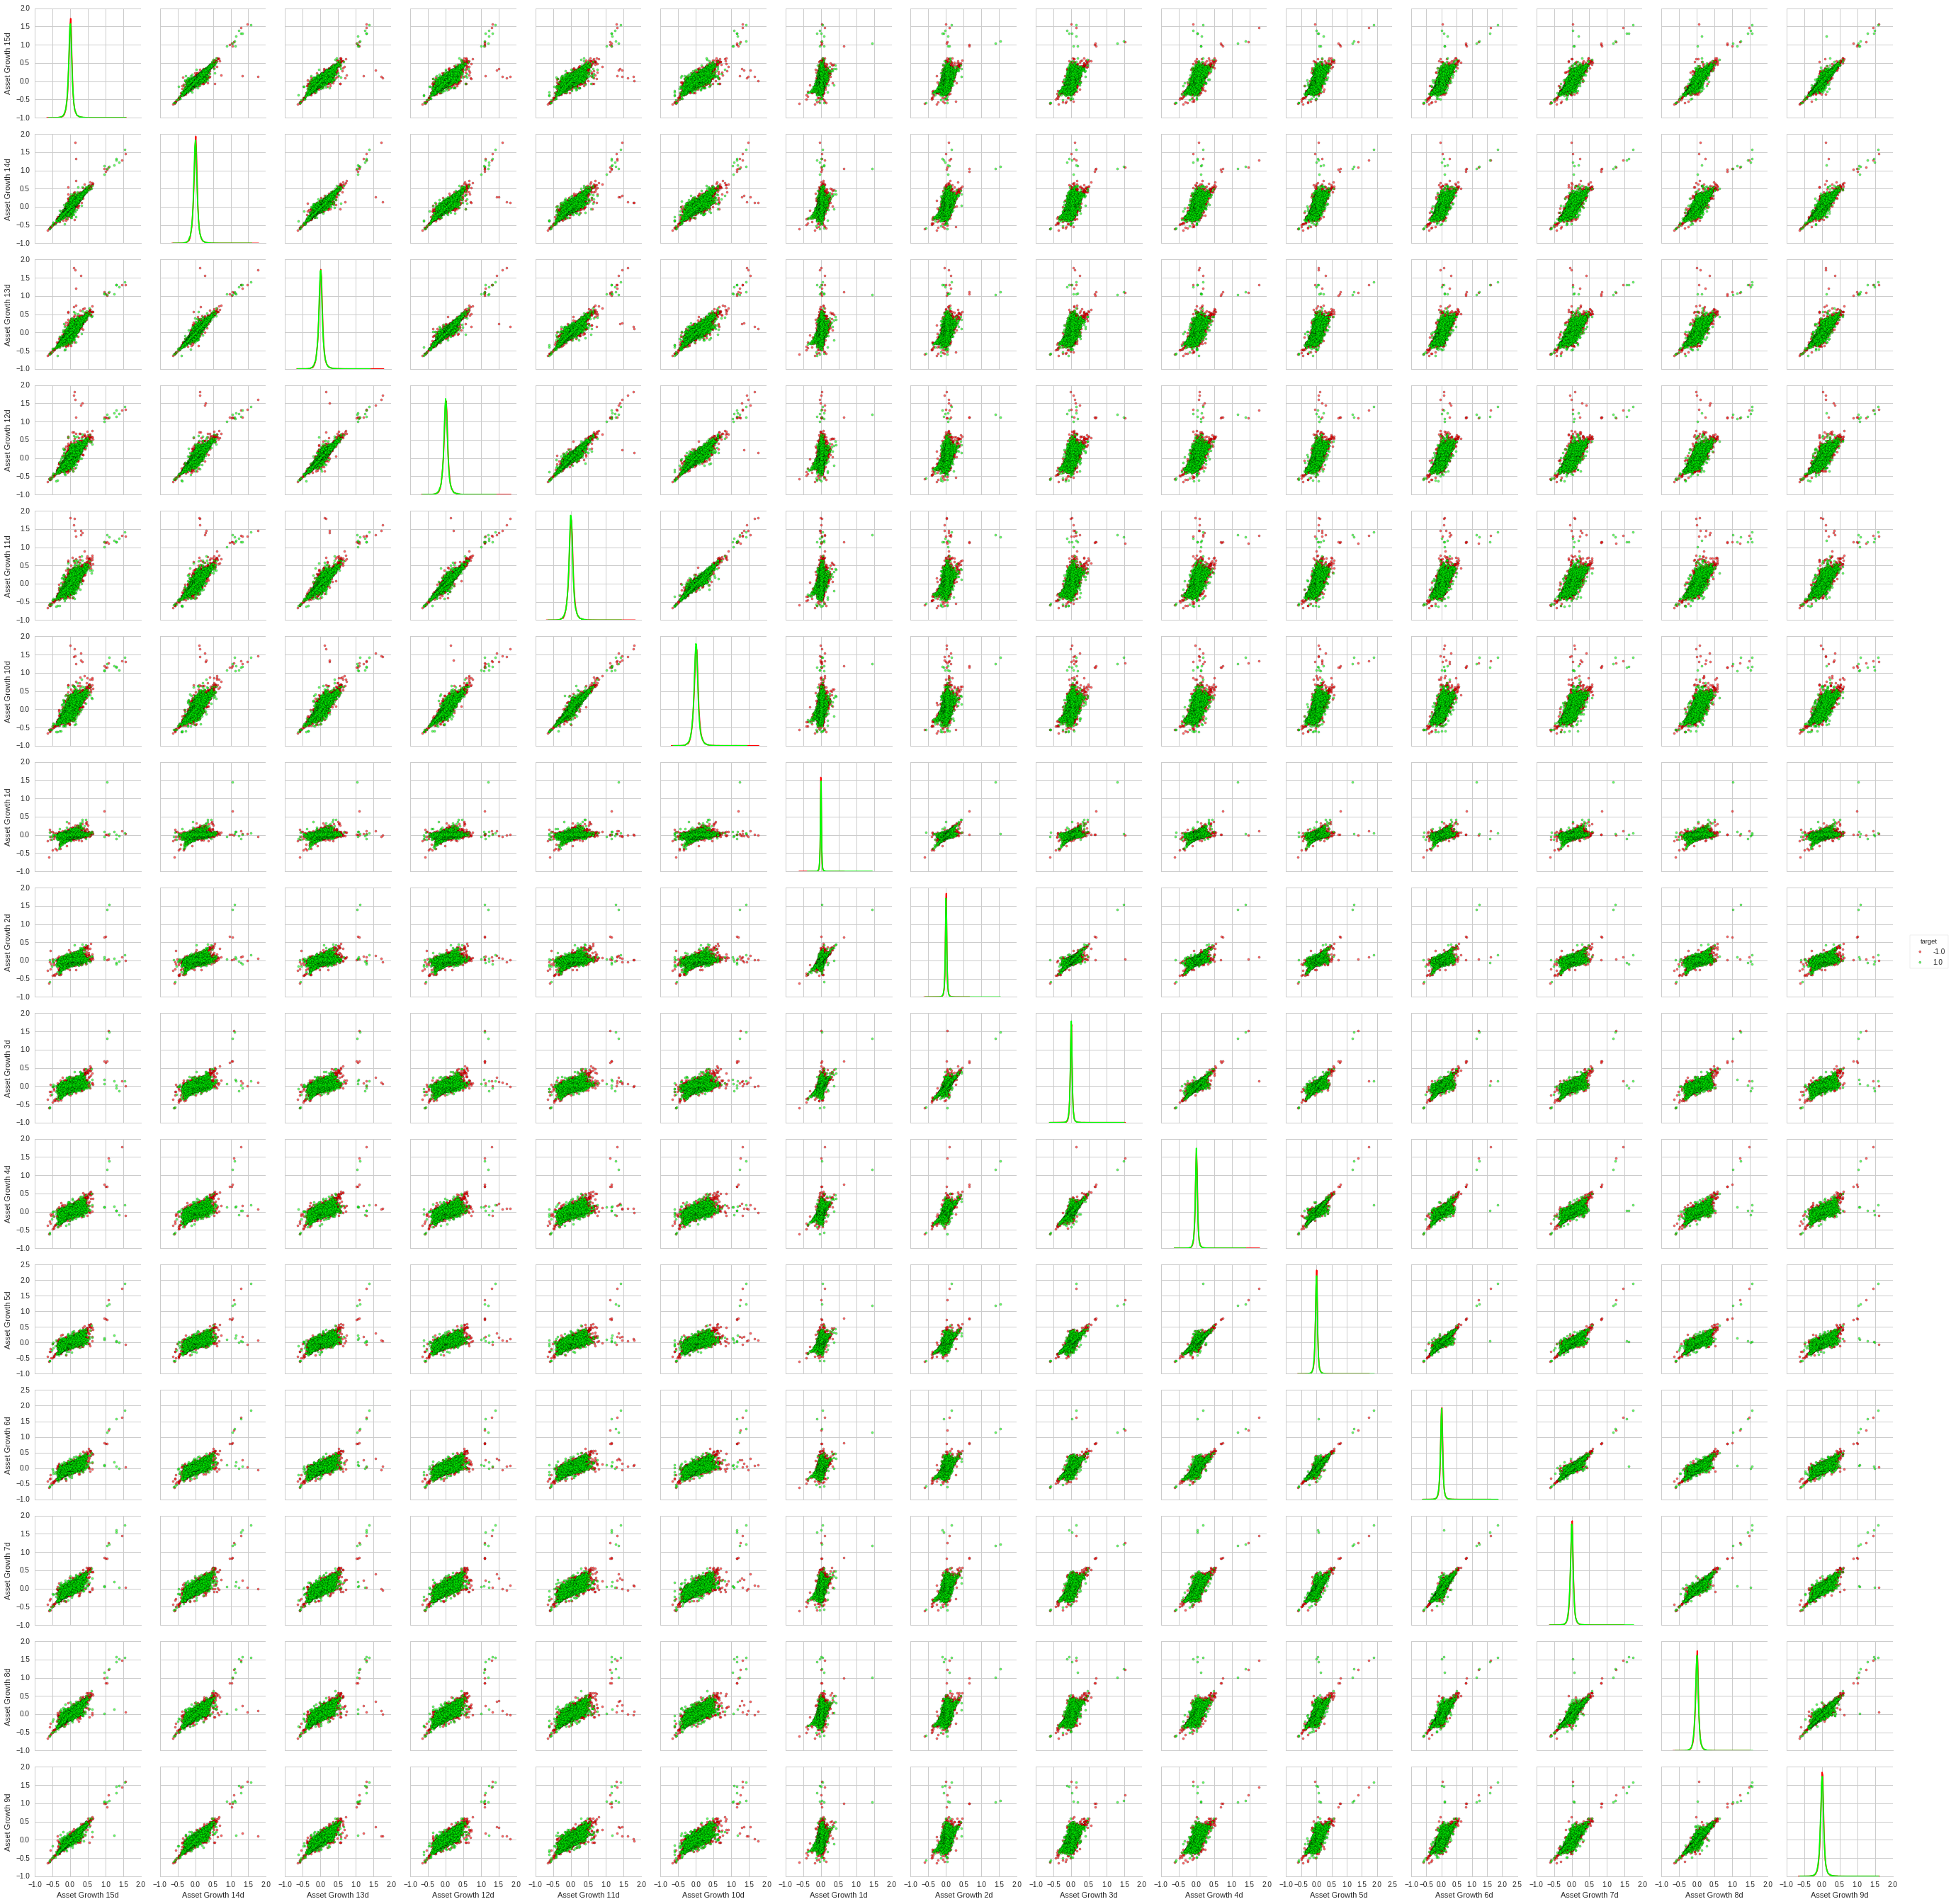

In [32]:
import seaborn as sns
sns.set()
palette = ['#FF0000','#00FF00']
sns.set_palette(palette)
sns.pairplot(df, vars=labels,  hue='target', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'});

## Train the Gaussian Naive Bayes model

In [33]:

start_timer = time()

# Train classifier
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train);

end_timer = time()

In [34]:
print "Time to train : %0.2f secs" % (end_timer - start_timer)

Time to train : 0.04 secs


In [37]:
from sklearn import metrics

Y_pred = clf.predict(X_train)
print('Accuracy on train set = {:.2f}%'.format(metrics.accuracy_score(Y_train, Y_pred) * 100))

Accuracy on train set = 52.04%


In [38]:
# Predict!
Y_pred = clf.predict(X_test)

Y_pred_prob = clf.predict_proba(X_test)

In [41]:
print 'Predictions:', Y_pred
print 'Probabilities of class == 1:', Y_pred_prob[:, 1] * 100

Predictions: [ 1.  1. -1. ..., -1. -1.  1.]
Probabilities of class == 1: [ 52.08051467  50.48562208  29.49901448 ...,  48.31817796  31.73904976
  74.19310908]


In [42]:
print('Accuracy on test set = {:.2f}%'.format(metrics.accuracy_score(Y_test, Y_pred) * 100))
print('Log-loss = {:.5f}'.format(metrics.log_loss(Y_test, Y_pred_prob)))

Accuracy on test set = 54.26%
Log-loss = 0.73243
